In [2]:
import numpy as np
import pandas as pd


# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1 Data Cleaning

In [14]:
df=pd.read_csv("spam.csv",encoding = 'latin1',engine="python")
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
#drop the missing value
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [17]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [18]:
df.sample(10)

,v1,v2
2975,ham,I love u 2 my little pocy bell I am sorry but ...
2579,ham,I dunno until when... Lets go learn pilates...
3705,ham,Reading gud habit.. Nan bari hudgi yorge patai...
1534,ham,Remember on that day..
2351,spam,Download as many ringtones as u like no restri...
3624,ham,I want to tel u one thing u should not mistake...
1393,ham,Oh ok..
2663,spam,8007 FREE for 1st week! No1 Nokia tone 4 ur mo...
818,ham,Then why you not responding
1447,ham,DonÛ÷t give a flying monkeys wot they think a...


In [19]:
# renaming the coloumn
df.rename({"v1":"target","v2":"text"},axis=1,inplace=True)

In [20]:
df.sample(10)

,target,text
2718,spam,18 days to Euro2004 kickoff! U will be kept in...
1379,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...
33,ham,For fear of fainting with the of all that hous...
3014,ham,&lt;#&gt; mins but i had to stop somewhere f...
5479,ham,Really do hope the work doesnt get stressful. ...
3861,ham,"Customer place, i wil cal u sir."
1914,spam,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...
4576,spam,Had your contract mobile 11 Mnths? Latest Moto...
2847,ham,Sad story of a Man - Last week was my b'day. M...
1206,spam,"As a SIM subscriber, you are selected to recei..."


In [21]:
# convert data value label to numeric 
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])

In [23]:
df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


0 => Ham

1 => Spam

In [25]:
# cek the missing value
df.isnull().sum()

target    0
text      0
dtype: int64

data is clean

In [28]:
# cek the duplicate data
df.duplicated().sum()

0

In [27]:
# remove the duplicate data
df.drop_duplicates(keep="first",inplace=True)

In [30]:
df.shape

(5169, 2)

# EDA => exploratary data analysis

In [31]:
# look again the data after processing
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# look at label data
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

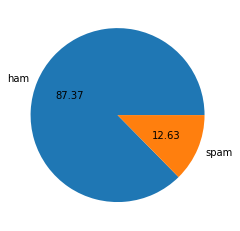

In [37]:
# visualize data
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%.2f")
plt.show()

In [38]:
# Data tidak balance jika tidak balance nya data maka dapat dilakukan sebuah
# feature engineering, atau membelah fitur dalam fitur
# menggunakan nltk
import nltk

In [39]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [40]:
df["num_characters"]=df["text"].apply(len)

In [41]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
# num of words
df["num_words"]=df["text"].apply(lambda x : len (nltk.word_tokenize(x)))

In [43]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
# make num sentence
df["num_sentences"]=df["text"].apply(lambda x : len (nltk.sent_tokenize(x)))

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


make the num characters and num word for can eat to manchine

In [48]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [50]:
# convert the label

# ham
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [51]:
# spam
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


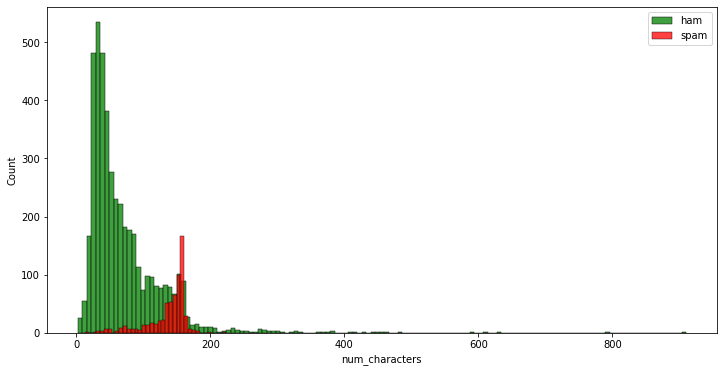

In [54]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_characters"],color="green",label="ham")
sns.histplot(df[df["target"]==1]["num_characters"],color="red",label="spam")
plt.legend()
plt.show()

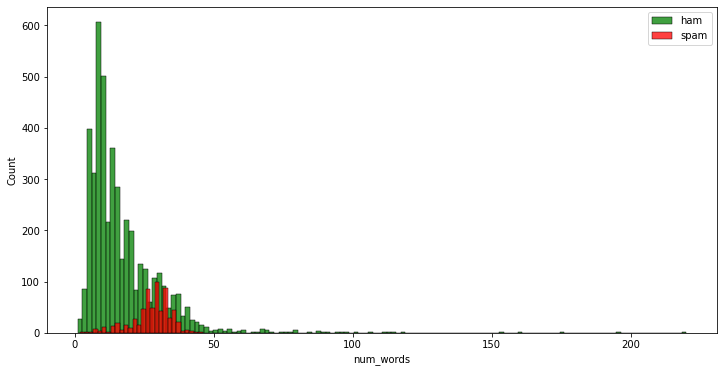

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_words"],color="green",label="ham")
sns.histplot(df[df["target"]==1]["num_words"],color="red",label="spam")
plt.legend()
plt.show()

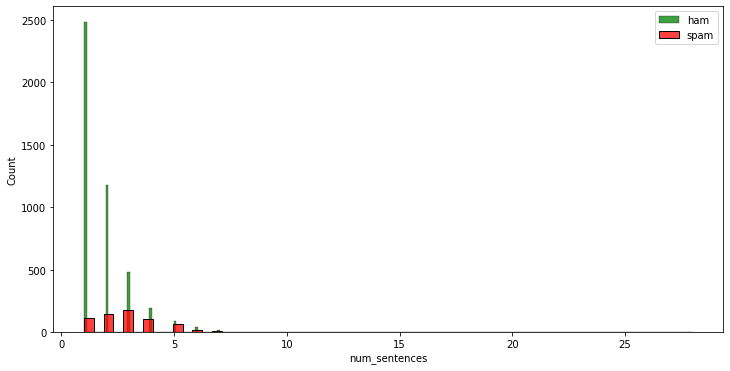

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_sentences"],color="green",label="ham")
sns.histplot(df[df["target"]==1]["num_sentences"],color="red",label="spam")
plt.legend()
plt.show()

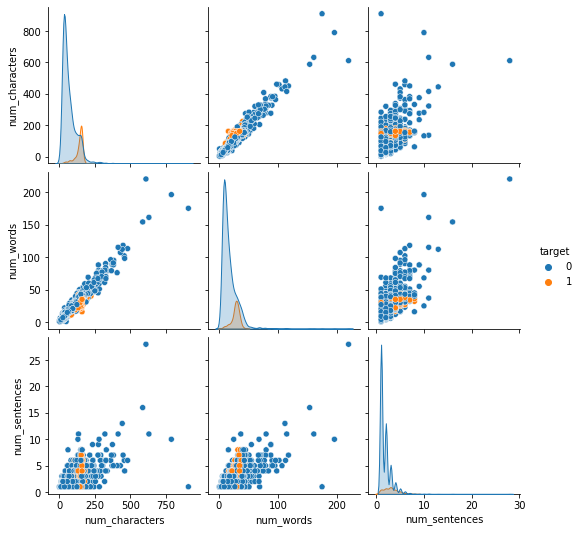

In [57]:
# to know the corelation for every field relationship with showed
sns.pairplot(df,hue="target")

In [67]:
# corelations data with the target
corelations=df.corr()
corelations["target"].sort_values(ascending=False)

target            1.000000
num_characters    0.384717
num_sentences     0.284901
num_words         0.262984
Name: target, dtype: float64

<AxesSubplot:>

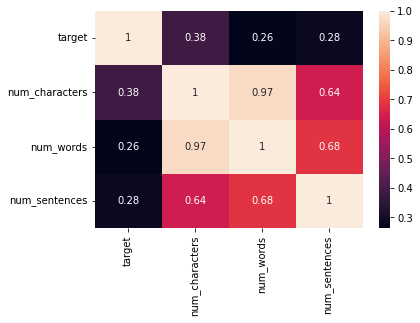

In [70]:
# or the corelation can be ilustrased by heatmap but this all corelation
sns.heatmap(df.corr(),annot=True)

# 3 Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming